# HW 4
### Team B 6
## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import linear_model
import scipy.stats as stats
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.precision", 4)

In [3]:
df = pd.read_excel('../data/dfa_analysis_data.xlsx', sheet_name = 1)
df = df.set_index('Date')
df.head()

,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07-31,0.0296,-0.0256,-0.0243,0.0022
1926-08-31,0.0264,-0.0117,0.0382,0.0025
1926-09-30,0.0036,-0.0140,0.0013,0.0023
1926-10-31,-0.0324,-0.0009,0.0070,0.0032
1926-11-30,0.0253,-0.0010,-0.0051,0.0031


## 2 Factors
### 1. Calculate the factors' univariate performance statistics:

In [4]:
factors = df.drop('RF',axis = 1)
# helper function for univariate performance statistics
def summary_stats(df, annual_fac):
    ss_df = (df.mean() * annual_fac).to_frame('Mean')
    ss_df['Vol'] = df.std() * np.sqrt(annual_fac)
    ss_df['Sharpe'] = ss_df['Mean'] / ss_df['Vol']
    ss_df['VaR'] = df.quantile(0.05)
    return ss_df.T

- Beginning - 1980:

In [5]:
print("Subsample period: Beginning - 1980")
summary_stats(factors[:"1980"],12)

Subsample period: Beginning - 1980


,Mkt-RF,SMB,HML
Mean,0.0811,0.0340,0.0495
Vol,0.2051,0.1146,0.1338
Sharpe,0.3957,0.2966,0.3697
VaR,-0.0840,-0.0434,-0.0429


- 1981 - 2001:

In [6]:
print("Subsample period: 1981 - 2001")
summary_stats(factors["1981":"2001"],12)

Subsample period: 1981 - 2001


,Mkt-RF,SMB,HML
Mean,0.0773,-0.0009,0.0637
Vol,0.1574,0.1184,0.1113
Sharpe,0.4908,-0.0074,0.5727
VaR,-0.0645,-0.0466,-0.0418


- 2002 - End:

In [7]:
print("Subsample period: 2002 - End")
summary_stats(factors["2002":],12)

Subsample period: 2002 - End


,Mkt-RF,SMB,HML
Mean,0.0833,0.0196,0.0017
Vol,0.1540,0.0858,0.1045
Sharpe,0.5409,0.2288,0.0161
VaR,-0.0788,-0.0378,-0.0410


### 2.
#### (a)
- Apart from SMB in the 1981 - 2001 subsample, all the factors show positive mean and seems to therefore have a premium.
#### (b)
- The mean of SMB drops to -0.0009 in the 1981 - 2001 subsample. Though the mean climbs back up to 0.0196 in the 2002 and beyond subsample, it is still not at the level of 0.0340 mean of the up to 1980 subsample. Therefore, it may well be said that the premium of the size factor gets smaller after 1980.
#### (c)
- The premium to the value factor gets higher after 1980, but in more recent period, it becomes negative.
#### (d)
- The market factor performs the best among all three factors. The performance of size factor has become much better than that during 1980-2001, but still the best performance was before 1980. Lastly, the value factor premium is positive, but much smaller than 2001 and prior.

### 3.

In [8]:
factors.corr()

,Mkt-RF,SMB,HML
Mkt-RF,1.0000,0.3163,0.2297
SMB,0.3163,1.0000,0.1147
HML,0.2297,0.1147,1.0000


In [9]:
print("Subsample period: Beginning - 1980")
factors[:"1980"].corr()

Subsample period: Beginning - 1980


,Mkt-RF,SMB,HML
Mkt-RF,1.0000,0.3663,0.4378
SMB,0.3663,1.0000,0.3091
HML,0.4378,0.3091,1.0000


In [10]:
print("Subsample period: 1981 - 2001")
factors["1981":"2001"].corr()

Subsample period: 1981 - 2001


,Mkt-RF,SMB,HML
Mkt-RF,1.0000,0.1643,-0.5268
SMB,0.1643,1.0000,-0.4548
HML,-0.5268,-0.4548,1.0000


In [11]:
print("Subsample period: 2002 - End")
factors["2002":].corr()

Subsample period: 2002 - End


,Mkt-RF,SMB,HML
Mkt-RF,1.0000,0.3162,0.1317
SMB,0.3162,1.0000,0.0929
HML,0.1317,0.0929,1.0000


- The correlation between the factors seem to be pretty small. The correlation in each sub-sample seem to be very small as well. However, the correlation for the before 1980 sub-sample seems to be higher than the other two sub-samples and the full-sample correlations.

### 4.

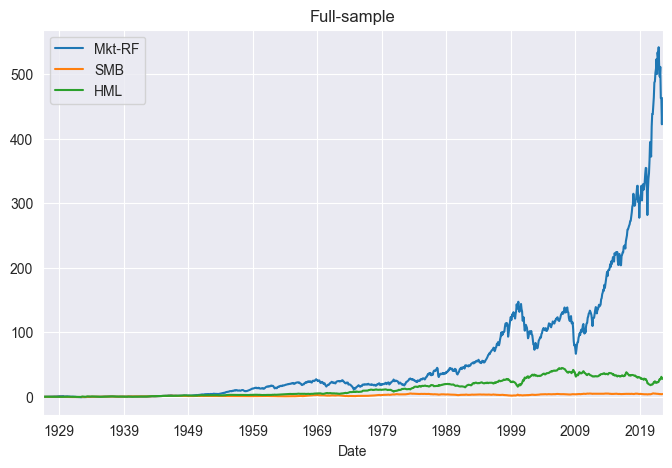

In [12]:
((factors + 1).cumprod() - 1).plot(figsize=(8,5),title = "Full-sample");

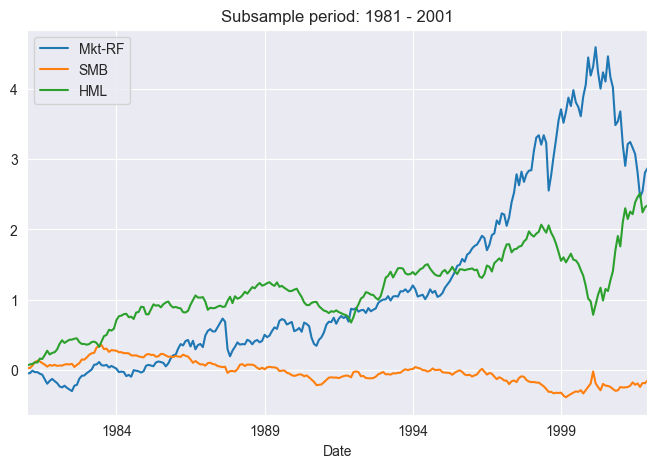

In [13]:
((factors["1981":"2001"] + 1).cumprod() - 1).plot(figsize=(8,5),title = "Subsample period: 1981 - 2001");

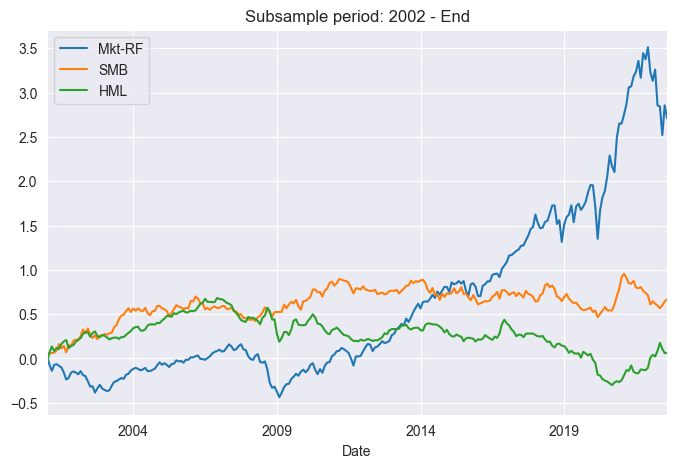

In [14]:
((factors["2001":] + 1).cumprod() - 1).plot(figsize=(8,5),title = "Subsample period: 2002 - End");

### 5.
- The value factor seems to show negative premium post 2002, and the size factor seems to show negative premium for 1981 - 2001. However, regardless of their individual performance, they could still be implemented in a portfolio for DFA since they have low correlation with the market.

## 3 CAPM
### 1.
- Univariate Statistics:

In [43]:
portfolios = pd.read_excel('../data/dfa_analysis_data.xlsx', sheet_name = 2)
portfolios = portfolios.set_index('Date')
portfolios_ex = portfolios.subtract(df['RF'],axis = 'rows')
subsample = portfolios_ex["1981":]

In [44]:
summary_stats(subsample,12)

,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,ME2 BM5,...,ME4 BM1,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM
Mean,0.0105,0.0957,0.0929,0.1200,0.1321,0.0603,0.1006,0.1066,0.1077,0.1181,...,0.0927,0.0945,0.0936,0.0998,0.1120,0.0889,0.0816,0.0811,0.0671,0.0963
Vol,0.2724,0.2359,0.1972,0.1914,0.2077,0.2457,0.2032,0.1831,0.1792,0.2120,...,0.2036,0.1770,0.1733,0.1733,0.1968,0.1632,0.1549,0.1523,0.1703,0.2058
Sharpe,0.0384,0.4058,0.4711,0.6270,0.6361,0.2453,0.4953,0.5824,0.6012,0.5571,...,0.4551,0.5341,0.5402,0.5756,0.5693,0.5447,0.5271,0.5324,0.3943,0.4681
VaR,-0.1165,-0.0976,-0.0864,-0.0752,-0.0883,-0.1046,-0.0840,-0.0787,-0.0764,-0.0942,...,-0.0839,-0.0734,-0.0756,-0.0693,-0.0833,-0.0753,-0.0656,-0.0704,-0.0756,-0.0985


- Graphing Mean ~ Vol for the 25 portfolios

In [66]:
port_summary = summary_stats(subsample,12).T
port_summary['portfolio_num'] = range(1,26)

markers=['o', 'v', '^', '>', '<', 'p', '*', 'X', 'D', '1','o',\
         'v', '^', '>', '<', 'p', '*', 'X', 'D', '1','o', 'v', '^', '>', '<']
sns.set_style("whitegrid")
ax = sns.lmplot('Vol', # Horizontal axis
                'Mean', # Vertical axis
                hue = 'portfolio_num',palette = "Set1",scatter_kws = {"s": 100},
                 data = port_summary, # Data source
                fit_reg = False, # Don't fix a regression line
                markers = markers,
                aspect = 1) # size and dimension
ax.fig.set_figwidth(16)
ax.fig.set_figheight(7)
plt.title('Portfolios sorted by their size-value characteristics', fontsize=18)
plt.xlabel('Volatility', fontsize=16)
plt.ylabel('Mean', fontsize=16)

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(int(point['val'])), fontsize=14,\
                horizontalalignment='center', verticalalignment='bottom')

label_point(port_summary.Vol, port_summary.Mean,port_summary.portfolio_num, plt.gca())

TypeError: lmplot() got multiple values for argument 'data'

In [65]:
port_summary[["Mean", "Vol", "portfolio_num"]]

,Mean,Vol,portfolio_num
SMALL LoBM,0.0105,0.2724,1
ME1 BM2,0.0957,0.2359,2
ME1 BM3,0.0929,0.1972,3
ME1 BM4,0.1200,0.1914,4
SMALL HiBM,0.1321,0.2077,5
ME2 BM1,0.0603,0.2457,6
ME2 BM2,0.1006,0.2032,7
ME2 BM3,0.1066,0.1831,8
ME2 BM4,0.1077,0.1792,9
ME2 BM5,0.1181,0.2120,10


In [61]:
ax = sns.lmplot('VaR', # Horizontal axis
               'Mean', # Vertical axis
               hue='portfolio_num',palette="Set1",scatter_kws={"s": 100},
                data=port_summary, # Data source
               fit_reg=False, # Don't fix a regression line
               markers=markers,
               aspect =1) # size and dimension
ax.fig.set_figwidth(16)
ax.fig.set_figheight(7)
plt.title('Portfolios sorted by their size-value characteristics', fontsize=18)
plt.xlabel('VaR', fontsize=16)
plt.ylabel('Mean', fontsize=16)

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(int(point['val'])), fontsize=14,\
                horizontalalignment='center', verticalalignment='bottom')

label_point(port_summary.VaR, port_summary.Mean,port_summary.portfolio_num, plt.gca())

TypeError: lmplot() got multiple values for argument 'data'

- The Mean v. Vol shows a very weak correlation in the scatter plot. Therefore, though somewhat positive, it is difficult to rule on a statistical relation ship between the mean excess return of a portfolio and the volatility. The similar goes to the relationship between mean excess return and VaR(0.5) statistic.

### 2.
#### (a)

In [26]:
capm_data = portfolios_ex.join(df['Mkt-RF'])["1981":]

In [27]:
capm_report = pd.DataFrame(index=portfolios_ex.columns)
rhs = sm.add_constant(capm_data['Mkt-RF'])
bm_residuals = pd.DataFrame(columns=portfolios_ex.columns)
t_p_values = pd.DataFrame()

for portf in portfolios_ex.columns:
    lhs = capm_data[portf]
    res = sm.OLS(lhs, rhs, missing='drop').fit()
    capm_report.loc[portf, 'alpha_hat'] = res.params['const'] * 12
    capm_report.loc[portf, 'beta_hat'] = res.params['Mkt-RF']
    capm_report.loc[portf, 'info_ratio'] = np.sqrt(12) * res.params['const'] / res.resid.std()
    capm_report.loc[portf, 'treynor_ratio'] = 12 * capm_data[portf].mean() / res.params['Mkt-RF']
    bm_residuals[portf] = res.resid
    t_p_values.loc[portf, 't-value'] = res.params['const']
    t_p_values.loc[portf, 't-value'] = res.tvalues['const']
    t_p_values.loc[portf, 'p-value'] = round(res.pvalues['const'], 4)

#### (b)

In [28]:
capm_report

,alpha_hat,beta_hat,info_ratio,treynor_ratio
SMALL LoBM,-0.0987,1.3600,-0.5750,0.0077
ME1 BM2,0.0018,1.1702,0.0122,0.0818
ME1 BM3,0.0097,1.0365,0.0857,0.0896
ME1 BM4,0.0425,0.9652,0.3585,0.1243
SMALL HiBM,0.0526,0.9907,0.3778,0.1333
ME2 BM1,-0.0475,1.3433,-0.3677,0.0449
ME2 BM2,0.0101,1.1286,0.0984,0.0892
ME2 BM3,0.0248,1.0193,0.2712,0.1046
ME2 BM4,0.0303,0.9654,0.3094,0.1116
ME2 BM5,0.0292,1.1086,0.2363,0.1066


#### (c)
- Alphas and Information Ratios would all be 0. Treynor Ratios would be equal to the mean excess market return.

### 3


In [29]:
# The dependent variable, (y): mean excess returns from each of the n = 25 portfolios.
y = subsample.mean()

# The regressor, (x): the market beta from each of the n = 25 time-series regressions.
X = sm.add_constant(capm_report['beta_hat'])

res = sm.OLS(y,X,missing='drop').fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     8.008
Date:                Mon, 24 Oct 2022   Prob (F-statistic):            0.00950
Time:                        12:57:54   Log-Likelihood:                 123.51
No. Observations:                  25   AIC:                            -243.0
Df Residuals:                      23   BIC:                            -240.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0165      0.003      5.362      0.000       0.010       0.023
beta_hat      -0.0082      0.003     -2.830      0.009      -0.014      -0.002
==============================================================================
Omnibus:                        4.531   Durbin-Watson:                   1.311
Prob(Omnibus):                  0.104   Jarque-Bera (JB):                2.975
Skew:                          -0.820   Prob(JB):                        0.226
Kurtosis:                       3.408   Cond. No.                         17.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### (a)

In [31]:
res.rsquared

0.2582451192136329

#### (b)

In [32]:
res.params[0] * 12

0.19798077049490953

#### (c)

In [33]:
res.params[1] * 12

-0.09815760379979312

-

In [34]:
capm_data['Mkt-RF'].mean() * 12

0.08024880000000001

If CAPM were true, the $R^2$ value would be much higher (closer to 100%), the intercept would be 0, and the regression coefficient $\lambda_m$ would be equal to the expected market excess return above computed as $\approx 0.0802$

### 4

- The result does support the fact that market risk cannot explain and account for all the returns (as shown by the low $R^2$ value and inconsistencies with the CAPM model). However, at the same time, there is no statistical evidence to suggest that value and size factors matter significantly.